In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
import joblib
from tqdm import tqdm

In [19]:
def read_ubyte(file_path,b,a=0,type="int"):
    with open(file_path, 'rb') as f:
        data = f.read()
    if type=="int":
        return int.from_bytes(data[a:b], byteorder='big')
    return data[a:b]

In [20]:
num_images=60000
imagedim=28

In [21]:
data=read_ubyte('/kaggle/input/mnist-dataset/train-images.idx3-ubyte',b=None,type=None)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

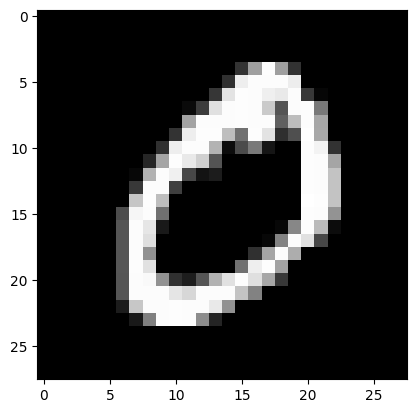

In [22]:
a=np.frombuffer(data, dtype=np.uint8, offset=16)
a=a.reshape(-1,28,28)
print(a[0])
plt.imshow(a[1], cmap='gray')
plt.show()



In [23]:
labels=read_ubyte('/kaggle/input/mnist-dataset/train-labels.idx1-ubyte',b=None,type=None)
b=np.frombuffer(labels, dtype=np.uint8, offset=8)
print(b.shape)

(60000,)


In [24]:
b=b.reshape(-1,1)
print(b.shape)

(60000, 1)


In [25]:
xy=np.concatenate([a.reshape(-1,784),b],axis=1)
print(xy.shape)

(60000, 785)


In [26]:
class Imageset(Dataset):
    def __init__(self,xy):
        super().__init__()
        self.xy=xy
    def __getitem__(self, index):
        z=self.xy[index]
        inpu=z[:784]/255
        inpu=inpu.reshape(28,28)
        inpu=inpu.unsqueeze(0)
        return inpu.to(torch.float32),z[784].to(torch.long)
    def __len__(self):
        return self.xy.shape[0]

In [27]:
fdata=Imageset(torch.from_numpy(xy))
floaded=DataLoader(fdata,batch_size=2000,shuffle=True)
for i,(x,y) in enumerate(floaded):
    print(x.shape)
    print(y.shape)
    break

torch.Size([2000, 1, 28, 28])
torch.Size([2000])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

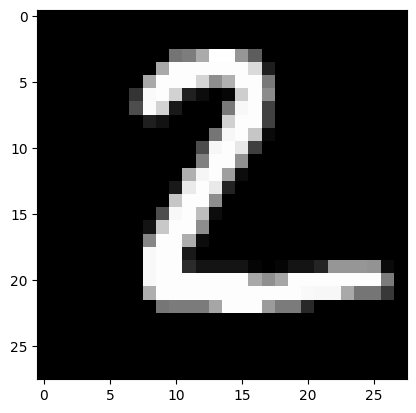

(10000,)
(10000, 1)
(10000, 785)
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([1024, 1, 28, 28])
torch.Size([1024])
torch.Size([784, 1, 28, 28])
torch.Size([784])


In [28]:
tdata=read_ubyte('/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte',b=None,type=None)
tlabels=read_ubyte('/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte',b=None,type=None)
ta=np.frombuffer(tdata, dtype=np.uint8, offset=16)
ta=ta.reshape(-1,28,28)
print(ta[0])
plt.imshow(ta[1], cmap='gray')
plt.show()
tb=np.frombuffer(tlabels, dtype=np.uint8, offset=8)
print(tb.shape)
tb=tb.reshape(-1,1)
print(tb.shape)
txy=np.concatenate([ta.reshape(-1,784),tb],axis=1)
print(txy.shape)
tfdata=Imageset(torch.from_numpy(txy))
tfloaded=DataLoader(tfdata,batch_size=1024)
for i,(x,y) in enumerate(tfloaded):
    print(x.shape)
    print(y.shape)

In [29]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [30]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Conv2d(1,6,3,padding=1)
        self.layer2=nn.LeakyReLU()
        self.layer3=nn.Conv2d(6,16,3,padding=1)
        self.layer4=nn.Conv2d(16,64,3,padding=1)
        self.layer5=nn.MaxPool2d(2,2)
        self.layer6=nn.Linear(64*28*28,128)
        self.layer7=nn.Linear(128,10)
    def forward(self,a):
        x=self.layer1(a)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer2(x)
        x=self.layer4(x)
        x=self.layer2(x)
        x=x.view(-1,64*28*28)
        x=self.layer6(x)
        x=self.layer2(x)
        x=self.layer7(x)
        return x

In [31]:
model=Model()
model=model.to(device)


In [32]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-2)
loss=nn.CrossEntropyLoss()


In [33]:
def evaluate(model, dataloader, device):
    model.eval()                    # put layers in eval mode
    
    total = 0
    correct = 0
    total_loss = 0

    with torch.no_grad():          # disable gradients
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)

            out = model(x)
            total_loss += loss(out, y).item()

            preds = torch.argmax(out, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    acc = 100 * correct / total
    print(f"Accuracy = {acc:.2f}%  |  Loss = {total_loss/len(dataloader):.4f}")
    return acc,total_loss


In [34]:
def evaluate(model, dataloader, device):
    model.eval()                    # put layers in eval mode
    
    total = 0
    correct = 0
    total_loss = 0

    with torch.no_grad():          # disable gradients
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)

            out = model(x)
            total_loss += loss(out, y).item()

            preds = torch.argmax(out, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    acc = 100 * correct / total
    print(f"Accuracy = {acc:.2f}%  |  Loss = {total_loss/len(dataloader):.4f}")
    return acc,total_loss


In [35]:
print(model)

Model(
  (layer1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer2): LeakyReLU(negative_slope=0.01)
  (layer3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer6): Linear(in_features=50176, out_features=128, bias=True)
  (layer7): Linear(in_features=128, out_features=10, bias=True)
)


In [37]:
bloss=float('inf')
for i in range(1,60000):
    tot_loss=0
    for _,(inp,out) in tqdm(enumerate(floaded),total=len(floaded),desc=f'Epoch {i}'):
        inp=inp.to(device)
        out=out.to(device)
        y_pred=model(inp)
        lossy=loss(y_pred,out)
        tot_loss+=lossy.item()
        optimizer.zero_grad()
        lossy.backward()
        optimizer.step()
        
    print(f'Epoch {i} has a loss of {tot_loss/len(floaded)}')
    evaluate(model,floaded,device) 
    a,z=evaluate(model,tfloaded,device) 
    if z<bloss: 
        bloss=z
        print(bloss) 
    joblib.dump({'model':model.state_dict() ,'loss':bloss},'mnistmodel2.pkl')

Epoch 1: 100%|██████████| 30/30 [00:02<00:00, 10.62it/s]


Epoch 1 has a loss of 0.30080961088339486
Accuracy = 93.11%  |  Loss = 0.2320
Accuracy = 93.21%  |  Loss = 0.2313
2.313059389591217


Epoch 2: 100%|██████████| 30/30 [00:02<00:00, 11.27it/s]


Epoch 2 has a loss of 0.19566215425729752
Accuracy = 95.26%  |  Loss = 0.1588
Accuracy = 95.47%  |  Loss = 0.1580
1.5796822160482407


Epoch 3: 100%|██████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch 3 has a loss of 0.14450224339962006
Accuracy = 96.03%  |  Loss = 0.1284
Accuracy = 95.95%  |  Loss = 0.1323
1.3229614943265915


Epoch 4: 100%|██████████| 30/30 [00:02<00:00, 10.70it/s]


Epoch 4 has a loss of 0.11889279037714004
Accuracy = 97.00%  |  Loss = 0.1001
Accuracy = 96.73%  |  Loss = 0.1034
1.0344688706099987


Epoch 5: 100%|██████████| 30/30 [00:02<00:00, 11.36it/s]


Epoch 5 has a loss of 0.10063970064123472
Accuracy = 97.23%  |  Loss = 0.0901
Accuracy = 96.94%  |  Loss = 0.0940
0.9399422388523817


Epoch 6: 100%|██████████| 30/30 [00:02<00:00, 10.85it/s]


Epoch 6 has a loss of 0.08879859546820322
Accuracy = 97.61%  |  Loss = 0.0776
Accuracy = 97.21%  |  Loss = 0.0854
0.8543656393885612


Epoch 7: 100%|██████████| 30/30 [00:02<00:00, 10.81it/s]


Epoch 7 has a loss of 0.0787332916011413
Accuracy = 97.91%  |  Loss = 0.0665
Accuracy = 97.56%  |  Loss = 0.0775
0.7749601807445288


Epoch 8: 100%|██████████| 30/30 [00:02<00:00, 11.20it/s]


Epoch 8 has a loss of 0.06940539206067721
Accuracy = 98.04%  |  Loss = 0.0607
Accuracy = 97.54%  |  Loss = 0.0760
0.7601322196424007


Epoch 9: 100%|██████████| 30/30 [00:02<00:00, 10.61it/s]


Epoch 9 has a loss of 0.06581948312620321
Accuracy = 98.25%  |  Loss = 0.0584
Accuracy = 97.49%  |  Loss = 0.0789


Epoch 10: 100%|██████████| 30/30 [00:02<00:00, 10.70it/s]


Epoch 10 has a loss of 0.05706525556743145
Accuracy = 98.39%  |  Loss = 0.0507
Accuracy = 97.60%  |  Loss = 0.0709
0.7091631349176168


Epoch 11: 100%|██████████| 30/30 [00:02<00:00, 11.15it/s]


Epoch 11 has a loss of 0.051238975425561266
Accuracy = 98.77%  |  Loss = 0.0396
Accuracy = 97.96%  |  Loss = 0.0631
0.6306899599730968


Epoch 12: 100%|██████████| 30/30 [00:02<00:00, 10.87it/s]


Epoch 12 has a loss of 0.04552279189229012
Accuracy = 98.87%  |  Loss = 0.0377
Accuracy = 97.89%  |  Loss = 0.0647


Epoch 13: 100%|██████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch 13 has a loss of 0.04033159048606952
Accuracy = 98.89%  |  Loss = 0.0368
Accuracy = 97.76%  |  Loss = 0.0671


Epoch 14: 100%|██████████| 30/30 [00:02<00:00, 11.27it/s]


Epoch 14 has a loss of 0.03864031694829464
Accuracy = 99.19%  |  Loss = 0.0280
Accuracy = 98.01%  |  Loss = 0.0610
0.6096961284056306


Epoch 15: 100%|██████████| 30/30 [00:02<00:00, 10.77it/s]


Epoch 15 has a loss of 0.030330949214597544
Accuracy = 99.16%  |  Loss = 0.0283
Accuracy = 97.95%  |  Loss = 0.0674


Epoch 16: 100%|██████████| 30/30 [00:02<00:00, 10.72it/s]


Epoch 16 has a loss of 0.02729562936971585
Accuracy = 99.41%  |  Loss = 0.0210
Accuracy = 98.08%  |  Loss = 0.0589
0.5885922033339739


Epoch 17: 100%|██████████| 30/30 [00:02<00:00, 11.26it/s]


Epoch 17 has a loss of 0.023882886798431476
Accuracy = 99.27%  |  Loss = 0.0235
Accuracy = 98.00%  |  Loss = 0.0708


Epoch 18: 100%|██████████| 30/30 [00:02<00:00, 10.73it/s]


Epoch 18 has a loss of 0.0223073473200202
Accuracy = 99.48%  |  Loss = 0.0163
Accuracy = 98.24%  |  Loss = 0.0596


Epoch 19: 100%|██████████| 30/30 [00:02<00:00, 10.50it/s]


Epoch 19 has a loss of 0.022846282615015905
Accuracy = 99.26%  |  Loss = 0.0220
Accuracy = 98.01%  |  Loss = 0.0657


Epoch 20: 100%|██████████| 30/30 [00:02<00:00, 11.16it/s]


Epoch 20 has a loss of 0.01842378607640664
Accuracy = 99.55%  |  Loss = 0.0150
Accuracy = 98.11%  |  Loss = 0.0645


Epoch 21: 100%|██████████| 30/30 [00:02<00:00, 10.33it/s]


Epoch 21 has a loss of 0.014096995412061612
Accuracy = 99.60%  |  Loss = 0.0133
Accuracy = 97.98%  |  Loss = 0.0678


Epoch 22: 100%|██████████| 30/30 [00:02<00:00, 10.70it/s]


Epoch 22 has a loss of 0.013647030231853326
Accuracy = 99.76%  |  Loss = 0.0089
Accuracy = 98.26%  |  Loss = 0.0633


Epoch 23: 100%|██████████| 30/30 [00:02<00:00, 11.20it/s]


Epoch 23 has a loss of 0.013141136166329186
Accuracy = 99.49%  |  Loss = 0.0158
Accuracy = 98.09%  |  Loss = 0.0776


Epoch 24: 100%|██████████| 30/30 [00:02<00:00, 10.56it/s]


Epoch 24 has a loss of 0.013811792867879072
Accuracy = 99.70%  |  Loss = 0.0098
Accuracy = 98.23%  |  Loss = 0.0670


Epoch 25: 100%|██████████| 30/30 [00:02<00:00, 10.85it/s]


Epoch 25 has a loss of 0.010456878536691269
Accuracy = 99.83%  |  Loss = 0.0063
Accuracy = 98.37%  |  Loss = 0.0659


Epoch 26: 100%|██████████| 30/30 [00:02<00:00, 11.03it/s]


Epoch 26 has a loss of 0.009564599627628923
Accuracy = 99.80%  |  Loss = 0.0071
Accuracy = 98.27%  |  Loss = 0.0667


Epoch 27: 100%|██████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch 27 has a loss of 0.006298383263250192
Accuracy = 99.91%  |  Loss = 0.0037
Accuracy = 98.37%  |  Loss = 0.0653


Epoch 28: 100%|██████████| 30/30 [00:02<00:00, 10.78it/s]


Epoch 28 has a loss of 0.003846802321883539
Accuracy = 99.96%  |  Loss = 0.0025
Accuracy = 98.35%  |  Loss = 0.0709


Epoch 29: 100%|██████████| 30/30 [00:02<00:00, 11.33it/s]


Epoch 29 has a loss of 0.0035803766649526855
Accuracy = 99.93%  |  Loss = 0.0029
Accuracy = 98.10%  |  Loss = 0.0720


Epoch 30: 100%|██████████| 30/30 [00:02<00:00, 10.77it/s]


Epoch 30 has a loss of 0.003493831609375775
Accuracy = 99.96%  |  Loss = 0.0021
Accuracy = 98.30%  |  Loss = 0.0703


Epoch 31: 100%|██████████| 30/30 [00:02<00:00, 10.66it/s]


Epoch 31 has a loss of 0.002151848591165617
Accuracy = 99.98%  |  Loss = 0.0017
Accuracy = 98.32%  |  Loss = 0.0711


Epoch 32: 100%|██████████| 30/30 [00:02<00:00, 10.98it/s]


Epoch 32 has a loss of 0.0014153111551422626
Accuracy = 99.98%  |  Loss = 0.0013
Accuracy = 98.38%  |  Loss = 0.0719


Epoch 33: 100%|██████████| 30/30 [00:02<00:00, 10.83it/s]


Epoch 33 has a loss of 0.0025478137928682068
Accuracy = 99.91%  |  Loss = 0.0031
Accuracy = 98.30%  |  Loss = 0.0824


Epoch 34: 100%|██████████| 30/30 [00:02<00:00, 10.76it/s]


Epoch 34 has a loss of 0.003985605320970838
Accuracy = 99.89%  |  Loss = 0.0036
Accuracy = 98.16%  |  Loss = 0.0908


Epoch 35: 100%|██████████| 30/30 [00:02<00:00, 11.31it/s]


Epoch 35 has a loss of 0.004602547579755385
Accuracy = 99.85%  |  Loss = 0.0050
Accuracy = 98.21%  |  Loss = 0.0860


Epoch 36: 100%|██████████| 30/30 [00:02<00:00, 10.67it/s]


Epoch 36 has a loss of 0.005068132374435663
Accuracy = 99.91%  |  Loss = 0.0031
Accuracy = 98.31%  |  Loss = 0.0802


Epoch 37: 100%|██████████| 30/30 [00:02<00:00, 10.84it/s]


Epoch 37 has a loss of 0.005821689959460249
Accuracy = 99.83%  |  Loss = 0.0057
Accuracy = 98.21%  |  Loss = 0.0886


Epoch 38: 100%|██████████| 30/30 [00:02<00:00, 11.32it/s]


Epoch 38 has a loss of 0.0100652981394281
Accuracy = 99.67%  |  Loss = 0.0090
Accuracy = 98.04%  |  Loss = 0.0952


Epoch 39: 100%|██████████| 30/30 [00:02<00:00, 10.76it/s]


Epoch 39 has a loss of 0.008109330991283059
Accuracy = 99.69%  |  Loss = 0.0087
Accuracy = 98.01%  |  Loss = 0.0943


Epoch 40: 100%|██████████| 30/30 [00:02<00:00, 10.82it/s]


Epoch 40 has a loss of 0.006285998574458063
Accuracy = 99.89%  |  Loss = 0.0035
Accuracy = 98.31%  |  Loss = 0.0858


Epoch 41: 100%|██████████| 30/30 [00:02<00:00, 11.24it/s]


Epoch 41 has a loss of 0.004305943759391084
Accuracy = 99.89%  |  Loss = 0.0037
Accuracy = 98.26%  |  Loss = 0.0868


Epoch 42: 100%|██████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch 42 has a loss of 0.004332556575536728
Accuracy = 99.93%  |  Loss = 0.0027
Accuracy = 98.28%  |  Loss = 0.0899


Epoch 43: 100%|██████████| 30/30 [00:02<00:00, 10.73it/s]


Epoch 43 has a loss of 0.002154132421128452
Accuracy = 99.98%  |  Loss = 0.0008
Accuracy = 98.35%  |  Loss = 0.0829


Epoch 44: 100%|██████████| 30/30 [00:02<00:00, 11.32it/s]


Epoch 44 has a loss of 0.001554839660335953
Accuracy = 100.00%  |  Loss = 0.0006
Accuracy = 98.39%  |  Loss = 0.0787


Epoch 45: 100%|██████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch 45 has a loss of 0.0015190176636679098
Accuracy = 99.97%  |  Loss = 0.0015
Accuracy = 98.25%  |  Loss = 0.0887


Epoch 46: 100%|██████████| 30/30 [00:02<00:00, 10.53it/s]


Epoch 46 has a loss of 0.0009668464694793026
Accuracy = 100.00%  |  Loss = 0.0004
Accuracy = 98.35%  |  Loss = 0.0873


Epoch 47: 100%|██████████| 30/30 [00:02<00:00, 11.36it/s]


Epoch 47 has a loss of 0.00046592786529799925
Accuracy = 99.99%  |  Loss = 0.0003
Accuracy = 98.36%  |  Loss = 0.0850


Epoch 48: 100%|██████████| 30/30 [00:02<00:00, 10.73it/s]


Epoch 48 has a loss of 0.00038155171011264126
Accuracy = 100.00%  |  Loss = 0.0002
Accuracy = 98.39%  |  Loss = 0.0863


Epoch 49: 100%|██████████| 30/30 [00:02<00:00, 10.73it/s]


Epoch 49 has a loss of 0.00014482412928676542
Accuracy = 100.00%  |  Loss = 0.0001
Accuracy = 98.34%  |  Loss = 0.0846


Epoch 50: 100%|██████████| 30/30 [00:02<00:00, 11.30it/s]


Epoch 50 has a loss of 7.825285222982833e-05
Accuracy = 100.00%  |  Loss = 0.0001
Accuracy = 98.43%  |  Loss = 0.0873


Epoch 51: 100%|██████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch 51 has a loss of 5.976115620190588e-05
Accuracy = 100.00%  |  Loss = 0.0001
Accuracy = 98.42%  |  Loss = 0.0871


Epoch 52: 100%|██████████| 30/30 [00:02<00:00, 10.56it/s]


Epoch 52 has a loss of 5.3378545453597324e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.42%  |  Loss = 0.0877


Epoch 53: 100%|██████████| 30/30 [00:02<00:00, 11.27it/s]


Epoch 53 has a loss of 4.890750387858134e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.42%  |  Loss = 0.0882


Epoch 54: 100%|██████████| 30/30 [00:02<00:00, 10.83it/s]


Epoch 54 has a loss of 4.527140469387329e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.44%  |  Loss = 0.0889


Epoch 55: 100%|██████████| 30/30 [00:02<00:00, 10.85it/s]


Epoch 55 has a loss of 4.2348929249177066e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.45%  |  Loss = 0.0892


Epoch 56: 100%|██████████| 30/30 [00:02<00:00, 11.25it/s]


Epoch 56 has a loss of 3.946313075478732e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.45%  |  Loss = 0.0898


Epoch 57: 100%|██████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch 57 has a loss of 3.717384697665693e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0901


Epoch 58: 100%|██████████| 30/30 [00:02<00:00, 10.74it/s]


Epoch 58 has a loss of 3.522160538220002e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0904


Epoch 59: 100%|██████████| 30/30 [00:02<00:00, 11.21it/s]


Epoch 59 has a loss of 3.333914367734299e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.45%  |  Loss = 0.0905


Epoch 60: 100%|██████████| 30/30 [00:02<00:00, 10.57it/s]


Epoch 60 has a loss of 3.183339510239118e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.45%  |  Loss = 0.0910


Epoch 61: 100%|██████████| 30/30 [00:02<00:00, 10.75it/s]


Epoch 61 has a loss of 3.0117793357931077e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.46%  |  Loss = 0.0916


Epoch 62: 100%|██████████| 30/30 [00:02<00:00, 11.31it/s]


Epoch 62 has a loss of 2.870140912515732e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0918


Epoch 63: 100%|██████████| 30/30 [00:02<00:00, 10.64it/s]


Epoch 63 has a loss of 2.7502743190173836e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.48%  |  Loss = 0.0923


Epoch 64: 100%|██████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch 64 has a loss of 2.6216696611906323e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0925


Epoch 65: 100%|██████████| 30/30 [00:02<00:00, 11.20it/s]


Epoch 65 has a loss of 2.509409738801575e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.48%  |  Loss = 0.0931


Epoch 66: 100%|██████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch 66 has a loss of 2.410182187304599e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.48%  |  Loss = 0.0932


Epoch 67: 100%|██████████| 30/30 [00:02<00:00, 10.72it/s]


Epoch 67 has a loss of 2.313864988536807e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.49%  |  Loss = 0.0936


Epoch 68: 100%|██████████| 30/30 [00:02<00:00, 11.36it/s]


Epoch 68 has a loss of 2.2346943448307382e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.46%  |  Loss = 0.0938


Epoch 69: 100%|██████████| 30/30 [00:02<00:00, 10.82it/s]


Epoch 69 has a loss of 2.1387031817236373e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0940


Epoch 70: 100%|██████████| 30/30 [00:02<00:00, 10.66it/s]


Epoch 70 has a loss of 2.070045599490792e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.49%  |  Loss = 0.0948


Epoch 71: 100%|██████████| 30/30 [00:02<00:00, 11.27it/s]


Epoch 71 has a loss of 1.982416127551308e-05
Accuracy = 100.00%  |  Loss = 0.0000
Accuracy = 98.47%  |  Loss = 0.0947


Epoch 72: 100%|██████████| 30/30 [00:02<00:00, 10.83it/s]


Epoch 72 has a loss of 1.9100810459349304e-05


KeyboardInterrupt: 

In [ ]:
print(next(model.parameters()).device)


In [ ]:
model=Model()

In [43]:
z=joblib.load("/kaggle/working/mnistmodel2.pkl")
state = z['model']

model.load_state_dict(state)

print("Model Loaded Successfully!")

Model Loaded Successfully!


In [44]:
model=model.to(torch.device("cpu"))

In [ ]:
print(model)

In [45]:
joblib.dump({'model':model.state_dict(),'loss':bloss},'mnistmodelf.pkl')  

['mnistmodelf.pkl']